In [17]:
import os, glob
from arcgis.gis import GIS 
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import zipfile


In [18]:
load_dotenv()  # take environment variables from .env.settings

True

In [21]:
ARCGIS_CLIENT_ID = os.getenv("ARCGIS_CLIENT_ID")
ARCGIS_CLIENT_SECRET = os.getenv("ARCGIS_CLIENT_SECRET")
INPUT_DATA = 'F:\TAM\Data\Road_Inventory_2024.gdb'
gis = GIS("https://heisenberg.maps.arcgis.com/home", client_id=ARCGIS_CLIENT_ID)
gis

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://heisenberg.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=kkSo7Iu4F1lpSSdn&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=p2Cniw0AWAtteWZEihN0bWI3PyGCaW&allow_verification=false


Exception: A general error occurred: (insecure_transport) OAuth 2 MUST utilize https.

<Item title:"Road_Inventory" type:Feature Layer Collection owner:Heisenberg16>
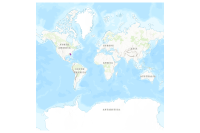

In [5]:
item = gis.content.get('a9dea1482dde4a01bb0307d3cfadacf3')
item

In [6]:
item.layers[0]

<FeatureLayer url:"https://services7.arcgis.com/VVs6oSRXhEAlFNFy/arcgis/rest/services/Road_Inventory/FeatureServer/0">

In [7]:
item.layers[0].properties

{
  "currentVersion": 11.5,
  "id": 0,
  "name": "Road_Inventory_lines",
  "type": "Feature Layer",
  "serviceItemId": "a9dea1482dde4a01bb0307d3cfadacf3",
  "cacheMaxAge": 30,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1768753455700,
    "schemaLastEditDate": 1768753404356,
    "dataLastEditDate": 1768753404356
  },
  "relationships": [],
  "isDataVersioned": false,
  "hasContingentValuesDefinition": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides": true,
  "supportsTilesAndBasicQueriesMode": tr

In [8]:
features = item.layers[0].query(where="1=1", out_fields='*', return_geometry=True)
features.sdf.head()

,FUNCTION_TYPE,COUNTY,SYSTEM_CODE,DIRECTION,ROUTE_ID,Comments,StateID,BeginDate,START_M,END_M,FROM_MILEPOINT,TO_MILEPOINT,BeginPoint,EndPoint,RouteId,Shape_Length,ObjectId,Shape__Length,SHAPE
0,1,1,2,INC,1001200075400INC,<NA>,13,2024-01-01,-0.0,0.230017,0.0,0.23,0.0,0.23,1001200075400INC,0.003904,1,434.622802,"{""paths"": [[[-9170125.1765677, 3720958.8160227..."
1,1,7,2,INC,1007200013100INC,<NA>,13,2024-01-01,-0.0,1.027014,0.0,1.027,0.0,1.027,1007200013100INC,0.016072,2,1937.865724,"{""paths"": [[[-9403513.96679128, 3674151.751024..."
2,1,5,2,INC,1005200015100INC,<NA>,13,2024-01-01,-0.0,3.327244,0.0,3.3272,0.0,3.3272,1005200015100INC,0.053257,3,6294.533131,"{""paths"": [[[-9194568.64233989, 3709997.212290..."
3,1,1,2,INC,1001200075500INC,<NA>,13,2024-01-01,-0.0,0.614356,0.0,0.6144,0.0,0.6144,1001200075500INC,0.010233,4,1164.070183,"{""paths"": [[[-9141101.21776292, 3745189.586384..."
4,1,5,2,INC,1005200015200INC,<NA>,13,2024-01-01,-0.0,0.205072,0.0,0.2051,0.0,0.2051,1005200015200INC,0.003271,5,387.973433,"{""paths"": [[[-9194312.0742907, 3710897.2983776..."


In [10]:
import shutil
import os



base_path = "F:\\TAM\\Data\\"
csv_folder = os.path.join(base_path, 'input_data')
print("Zipping datasets...")

csv_zip = shutil.make_archive(os.path.join(base_path, 'input_data'), 'zip', csv_folder)
print(f"Created zip file at: {csv_zip}")

Zipping datasets...
Created zip file at: F:\TAM\Data\input_data.zip


In [ ]:
item = gis.content.get('c2e3b9b2068a4a4bbd6f3754f770c155')
item